<a href="https://colab.research.google.com/github/Blessy-VC/FML/blob/main/logistic_binary_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
data=pd.read_csv("diabetes.csv")
print(data)

     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4      

In [8]:
x = data.drop('diabetes', axis=1).values
y = data['diabetes'].values

In [145]:
x= data.iloc[:, [1,3]].values  
y= data.iloc[:, -1].values  

In [146]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [147]:
diab = LogisticRegression(C=0.5)
diab.fit(x_train,y_train)

LogisticRegression(C=0.5)

In [148]:
x_train.shape,y_train.shape

((576, 2), (576,))

In [149]:
diab.classes_

array([0, 1])

In [150]:
diab.intercept_

array([-5.47700167])

In [151]:

diab.coef_

array([[0.03699862, 0.01297126]])

In [155]:
diab.predict_proba(x_train)

array([[0.89881484, 0.10118516],
       [0.6557022 , 0.3442978 ],
       [0.89188365, 0.10811635],
       ...,
       [0.84732387, 0.15267613],
       [0.91150245, 0.08849755],
       [0.60949501, 0.39050499]])

In [179]:
y_pred = diab.predict(x_train)
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 

In [180]:
diab.score(x_train,y_train)

0.7361111111111112

In [181]:
confusion_matrix(y_train,y_pred)

array([[333,  37],
       [115,  91]])

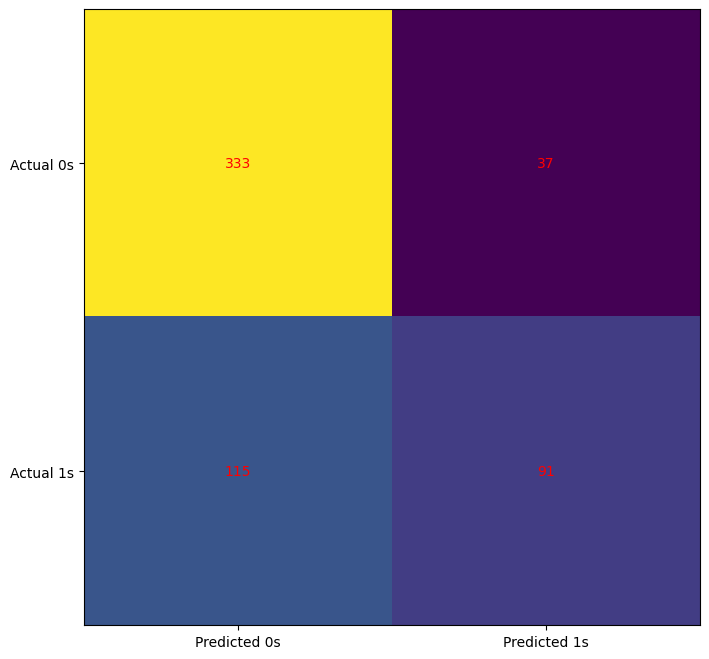

In [182]:
cm = confusion_matrix(y_train, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [183]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       370
           1       0.71      0.44      0.54       206

    accuracy                           0.74       576
   macro avg       0.73      0.67      0.68       576
weighted avg       0.73      0.74      0.72       576



In [166]:
diab = LogisticRegression(C=0.5)
diab.fit(x_test,y_test)

LogisticRegression(C=0.5)

In [184]:
diab.predict_proba(x_test)

array([[0.12681424, 0.87318576],
       [0.83754768, 0.16245232],
       [0.92334604, 0.07665396],
       [0.28569868, 0.71430132],
       [0.7431423 , 0.2568577 ],
       [0.92647566, 0.07352434],
       [0.46543695, 0.53456305],
       [0.22911756, 0.77088244],
       [0.67745489, 0.32254511],
       [0.86185123, 0.13814877],
       [0.41208805, 0.58791195],
       [0.15955027, 0.84044973],
       [0.71912143, 0.28087857],
       [0.9274602 , 0.0725398 ],
       [0.9628499 , 0.0371501 ],
       [0.81170112, 0.18829888],
       [0.24449363, 0.75550637],
       [0.93986814, 0.06013186],
       [0.65364613, 0.34635387],
       [0.87418349, 0.12581651],
       [0.53988981, 0.46011019],
       [0.68505429, 0.31494571],
       [0.9135977 , 0.0864023 ],
       [0.97031736, 0.02968264],
       [0.86297939, 0.13702061],
       [0.72610485, 0.27389515],
       [0.79374235, 0.20625765],
       [0.46561593, 0.53438407],
       [0.79013504, 0.20986496],
       [0.75084383, 0.24915617],
       [0.

In [185]:
diab.score(x_test,y_test)

0.7760416666666666

In [186]:
y_pred = diab.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0]


In [187]:
confusion_matrix(y_test,y_pred)

array([[118,  12],
       [ 31,  31]])

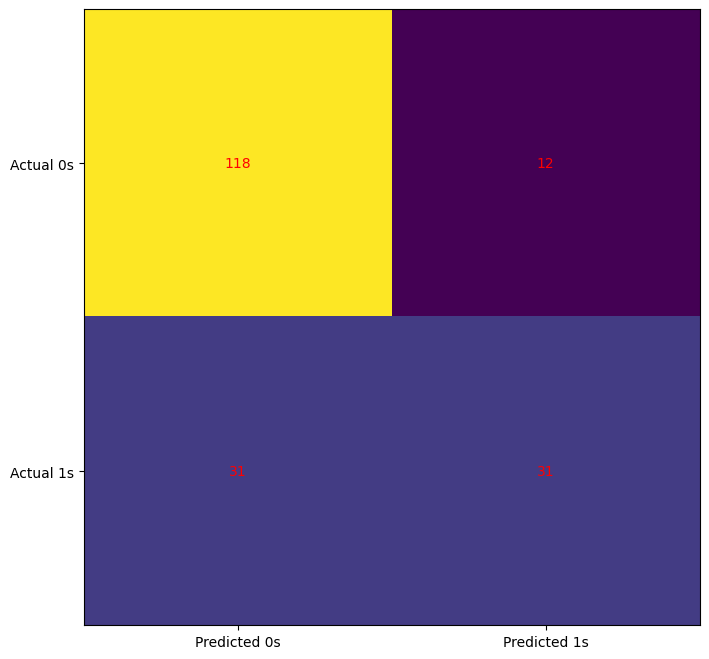

In [188]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       130
           1       0.72      0.50      0.59        62

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.72       192
weighted avg       0.77      0.78      0.76       192

